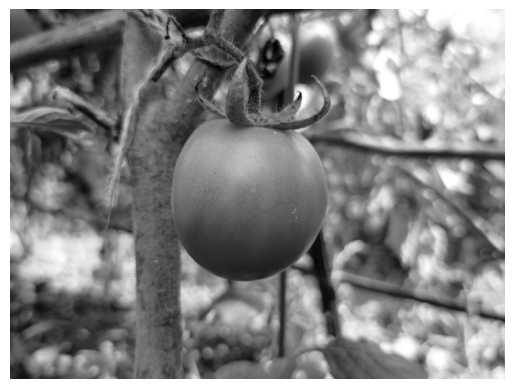

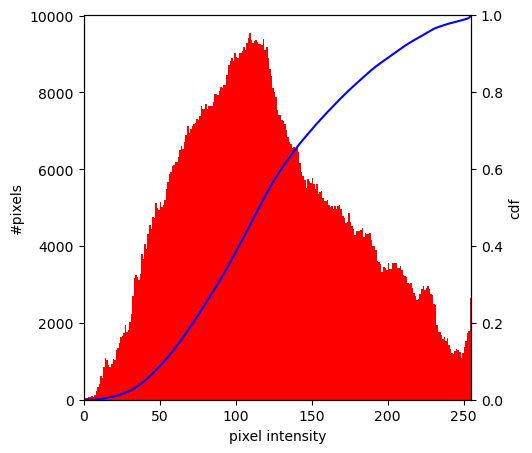

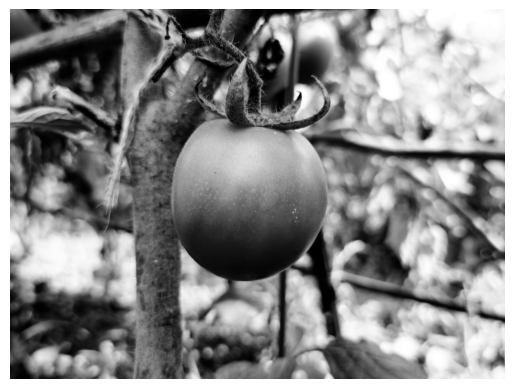

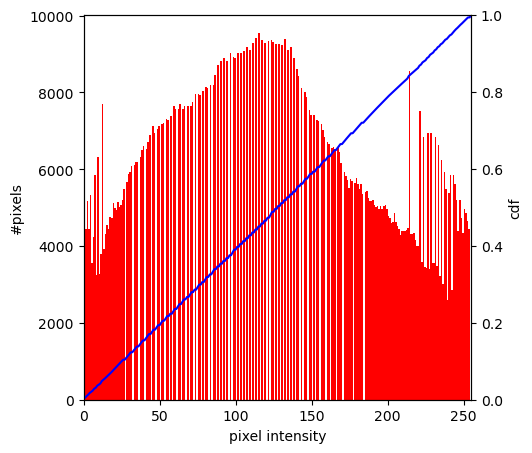

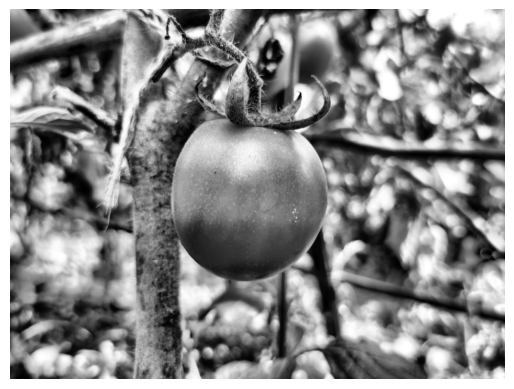

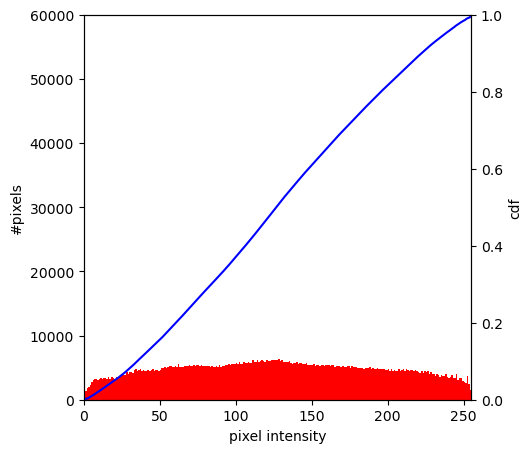

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# original image
f = cv2.imread('img3.jpg', 0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(f.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(f.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

# histogram equalization (global)
equ = cv2.equalizeHist(f)

plt.imshow(equ, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(equ.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(equ.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()

# CLAHE (local)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahef = clahe.apply(f)

plt.imshow(clahef, cmap='gray')
plt.axis('off')
plt.show()

hist, bins = np.histogram(clahef.flatten(),
                          bins=256,
                          range=[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()

fig, ax = plt.subplots(figsize=(5,5))

ax.hist(clahef.flatten(),
        bins=256,
        range=[0,256],
        color='r')
ax.set_xlabel('pixel intensity')
ax.set_ylabel('#pixels')
ax.set_xlim(0,255)
ax.set_ylim(0,60000)

ax2 = ax.twinx()
ax2.plot(cdf_normalized, color='b')
ax2.set_ylabel('cdf')
ax2.set_ylim(0,1)

plt.show()